# PL: Ceny akcji Exxon mobil
# ENG: Exxon mobil stock prices

PL: ExxonMobil jest jedną z największych spółek giełdowych notowanych w obrocie publicznym pod względem kapitalizacji rynkowej na świecie (spółka wyceniana jest obecnie na ponad 400 mld dolarów). Pod koniec 2007 r. ExxonMobil posiadał rezerwy w ilości równoważnej 72 mld baryłkom ropy naftowej. Z 37 rafineriami w 21 krajach mogącymi produkować łącznie 6,3 mln baryłek (ok. 1 mln m³) dziennie, jest największym prywatnym producentem ropy naftowej na świecie.
https://pl.wikipedia.org/wiki/ExxonMobil

ENG: Exxon Mobil Corporation, doing business as ExxonMobil, is an American multinational oil and gas corporation headquartered in Irving, Texas. It is the largest direct descendant of John D. Rockefeller's Standard Oil, and was formed on November 30, 1999 by the merger of Exxon (formerly the Standard Oil Company of New Jersey) and Mobil (formerly the Standard Oil Company of New York). ExxonMobil's primary brands are Exxon, Mobil, Esso, and ExxonMobil Chemical.[3] ExxonMobil is incorporated in Texas.
https://en.wikipedia.org/wiki/ExxonMobil

In [51]:
import pandas as pd
import numpy as np
import datetime as dt
import pyodbc
import quandl
import matplotlib.pyplot as plt
import math as math
import os 
import plotly.express as px
%matplotlib inline

In [52]:
#Opcje wyswietlania wyników biblioteki pandas
#Display options
pd.set_option('display.min_rows', 100)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 1000)

In [53]:
#Pobieranie danych z strony macrotrends.net
#Dowloading data from macrotrends.net
indicator="Exxon_mobil"
url="http://download.macrotrends.net/assets/php/stock_data_export.php?t=XOM"
df=pd.read_table(url,sep=',',skiprows=16)

#Zmienianie nazwy kolumn
#Rename columns
df = df.rename(columns={df.columns[0]: 'Date', df.columns[4]: 'USD'})
df = df[['Date', 'USD']].copy()
df.dropna(subset = ['USD'], inplace=True)

#Wybieranie cen akcji od  daty 2010-01-01
#Select price from 2010-01-01
filter = (df['Date'] >= '2010-01-01')
df = df[filter]

df.head(10)

Date    USD
10095  2010-01-04  69.15
10096  2010-01-05  69.42
10097  2010-01-06  70.02
10098  2010-01-07  69.80
10099  2010-01-08  69.52
10100  2010-01-11  70.30
10101  2010-01-12  69.95
10102  2010-01-13  69.67
10103  2010-01-14  69.68
10104  2010-01-15  69.11

In [54]:
#Wyswietlanie danych na wykresie przy pomocy biblioteki plotly.express
#Displaying data in graph with plotly.express
fig = px.line(df, x='Date', y='USD')

fig.update_layout(
    title_text= indicator +" - ceny akcji od 2010 do teraz, źrodło:\"macrotrends.net\"" +'<br>'+ indicator+" stocks price from 2010-current, source:\"macrotrends.net\"",title_x=0.5,
    xaxis_title="Data (Date)",
    yaxis_title="Cena (USD)",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="#7f7f7f"
    ))

fig.show()


# PL: Przewidywane ceny akcji Exxon mobil z Prophet
# ENG: Predictions Exxon mobil with Prophet

In [55]:
#Konwertowanie kolumny data na typ daty
#Convert column type to date time
df["Date"] = pd.to_datetime(df["Date"])

#Ustawienie kolumny Date jako index
#Set date to index
df.index = df['Date']
df = df.drop(columns=['Date'])

df.tail()

USD
Date             
2020-05-04  44.88
2020-05-05  44.83
2020-05-06  43.99
2020-05-07  44.24
2020-05-08  46.18

In [56]:
#Resetowanie indexu
#Reset index
df = df.reset_index()

#Zmiana nazwy kolumn dla biblioteki prophet
#Rename columns for prophet library
df = df.rename(columns={'Date': 'ds', 'USD': 'y'})

#Wyswietlanie ramki danych df
#Display Data Frame df
df.tail()

ds      y
2600 2020-05-04  44.88
2601 2020-05-05  44.83
2602 2020-05-06  43.99
2603 2020-05-07  44.24
2604 2020-05-08  46.18

In [57]:
#Importowanie biblioteki Prophet
#Import Prophet library
from fbprophet import Prophet

#Inicjowanie nowego objektu Prophet
#Instantiating a new Prophet object
m = Prophet(daily_seasonality=True)

#Wywołanie metody dopasowania obiektu i wprowadzenie jej w ramke danych df
#Call object's fit method and pass in the historical dataframe
m.fit(df)

In [58]:
#Dodanie przyszłych dat do kolumny "ds"
#Extend the "ds" column with forecast
future = m.make_future_dataframe(freq='D',periods=365)
future.tail()

ds
2965 2021-05-04
2966 2021-05-05
2967 2021-05-06
2968 2021-05-07
2969 2021-05-08

In [59]:
#Przypisane przewidywanych danych
#Assign predicted values
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
2965 2021-05-04  46.866878   36.835356   57.790185
2966 2021-05-05  46.812614   36.049652   57.002980
2967 2021-05-06  46.847745   36.541120   57.297920
2968 2021-05-07  46.813982   36.362833   56.900113
2969 2021-05-08  47.457345   36.660534   58.364007

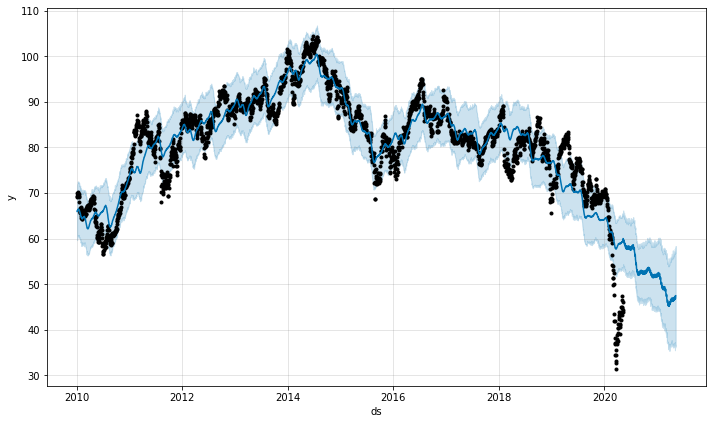

In [60]:
#Wyswietlanie grafu z przewidywanymi wartosciami 
#Show a plot with the forecast
fig1 = m.plot(forecast)

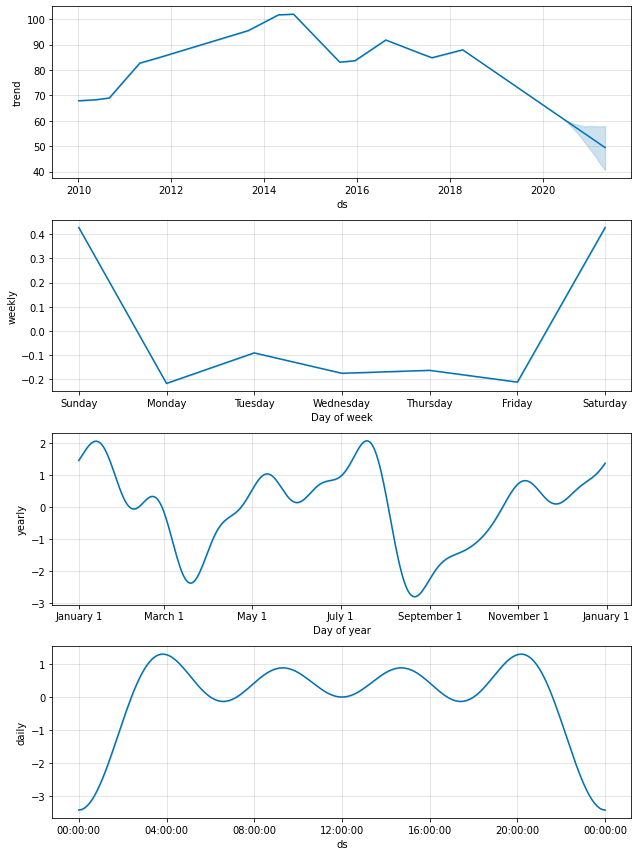

In [61]:
#Wyswietlanie grafu z przewidywanymi wartosciami 
#Show a plot with the forecast
fig2 = m.plot_components(forecast)

In [76]:
from fbprophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

#Dodanie lini trendu to wykresu
#Add trendline to plot
fig = plot_plotly(m, forecast,trend=True)



#Dodanie lini trendu to wykresu
#Add trendline to plot
fig.update_layout(
    title=indicator +" przewidywane ceny akcji do 2021 - źrodło:\"macrotrends.net\"" +'<br>'+ indicator+ " price forecast 2021 using Prophet - source:\"macrotrends.net\"",
    xaxis_title="Data (Date)",
    yaxis_title="Cena (Price)",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="#242151"
    )
)
py.iplot(fig)

In [63]:
#Złączanie dwóch ramek danych 
#Merge two Data Frames (imported from .csv file and forecast) on date column ('ds')
df2 = df.merge(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']],sort=True,on=['ds'],how="outer")

#Zmiana nazwy  kolumn
#Rename the columns title
df2 = df2.rename(columns={'ds': 'Date', 'y': 'Index','yhat': 'Forecast',
                          'yhat_lower': 'Forecast_(lower)','yhat_upper': 'Forecast_(upper)'})

#Wyswietlanie pierwszych pozycji w ramce danych
#Display header
df2.tail(15)

Date  Index   Forecast  Forecast_(lower)  Forecast_(upper)
2955 2021-04-24    NaN  46.999245         37.072220         57.080568
2956 2021-04-25    NaN  47.026813         37.098624         57.184454
2957 2021-04-26    NaN  46.416139         36.439398         56.288184
2958 2021-04-27    NaN  46.578687         36.199581         56.830541
2959 2021-04-28    NaN  46.534672         36.187916         56.648219
2960 2021-04-29    NaN  46.589448         36.451833         56.837800
2961 2021-04-30    NaN  46.584752         36.588413         56.769887
2962 2021-05-01    NaN  47.266344         37.083872         57.422818
2963 2021-05-02    NaN  47.308862         37.251753         57.778087
2964 2021-05-03    NaN  46.705502         35.473726         56.581061
2965 2021-05-04    NaN  46.866878         36.835356         57.790185
2966 2021-05-05    NaN  46.812614         36.049652         57.002980
2967 2021-05-06    NaN  46.847745         36.541120         57.297920
2968 2021-05-07    NaN  46.813982         36.362833         56.900113
2969 2021-05-08    NaN  47.457345         36.660534         58.364007

In [64]:
#Obliczanie średniej dla kazdej kolumny
#Calculation of mean for every column
meanIndex = df2['Index'].mean()
meanForecast = df2['Forecast'].mean()
meanForecastLower = df2['Forecast_(lower)'].mean()
meanForecastUpper = df2['Forecast_(upper)'].mean()

#Słownik dla wartosci średnich
#Dictionary with mean values
meanDict = ({'Index': meanIndex, 'Forecast': meanForecast,
            'Forecast_(Lower)': meanForecastLower, 'Forecast_(Upper)': meanForecastUpper})

#Wyswietlanie średnich wartości
#Display mean
print('Mean: ')
meanDict

Mean: 


{'Index': 81.30268940499036,
 'Forecast': 77.73777885174431,
 'Forecast_(Lower)': 71.74930342076033,
 'Forecast_(Upper)': 83.71797223651669}

In [65]:
#Maksymalne wartosci
#Max values
maxIndex = df2['Index'].max()
maxForecast = df2['Forecast'].max()
maxForecastLower = df2['Forecast_(lower)'].max()
maxForecastUpper = df2['Forecast_(upper)'].max()

#Słownik dla wartosci maksymalnych
#Dictionary with max values
maxDict = ({'Index': maxIndex, 'Forecast': maxForecast,
            'Forecast_(Lower)': maxForecastLower, 'Forecast_(Upper)': maxForecastUpper})
#Wyswietlanie maksymalnych wartości
#Display max
print('Max value: ')
maxDict

Max value: 


{'Index': 104.38,
 'Forecast': 100.45007308149884,
 'Forecast_(Lower)': 95.28304631547238,
 'Forecast_(Upper)': 106.78406136440628}

In [66]:
#Minimalne wartosci
#Min values
minIndex = df2['Index'].min()
minForecast = df2['Forecast'].min()
minForecastLower = df2['Forecast_(lower)'].min()
minForecastUpper = df2['Forecast_(upper)'].min()

#Słownik z wartosciami minimalnymi
#Dictionary with min values
minDict = ({'Index': minIndex, 'Forecast': minForecast,
            'Forecast_(Lower)': minForecastLower, 'Forecast_(Upper)': minForecastUpper})
#Wyswietlanie minimalnych wartości
#Display min
print('Min: ')
minDict

Min: 


{'Index': 31.45,
 'Forecast': 45.140925314382166,
 'Forecast_(Lower)': 35.330966943008036,
 'Forecast_(Upper)': 53.87490530070461}

In [67]:
#Wyswietlanie ile rekordow znajduje się powyzej lub ponizej przewidywanej wartosci akcji
#How many rows is above or below average predicted value
indexAboveMeanForecast = df2["Index"].between(meanForecast,maxIndex)
indexBelowMeanForecast = df2["Index"].between(minIndex,meanForecast)

In [68]:
#Wyswietlanie kiedy wystapila najmiejsza wartość
#Smallest value date
minIndex = df2.nsmallest(n=1,columns='Index')
minIndexValue = minIndex['Index'].loc[minIndex.index]
minIndexDate = minIndex['Date'].loc[minIndex.index].to_string(index=False)

#Wyswietlanie kiedy wystapila największa wartość
#Largest value date
maxIndex = df2.nlargest(n=1,columns='Index')
maxIndexValue = maxIndex['Index'].loc[maxIndex.index]
maxIndexDate = maxIndex['Date'].loc[maxIndex.index].to_string(index=False)

#Wyswietlanie kiedy wystapila najmiejsza przewidywana wartość
#Smallest predicted value dat
minForecast = df2.nsmallest(n=1,columns='Forecast')
minForecastValue = minForecast['Forecast'].loc[minForecast.index]
minForecastDate = minForecast['Date'].loc[minForecast.index].to_string(index=False)

#Wyswietlanie kiedy wystapila największa przewidywana wartość
#Largest predicted value date
maxForecast = df2.nlargest(n=1,columns='Forecast')
maxForecastValue = maxForecast['Forecast'].loc[maxForecast.index]
maxForecastDate = maxForecast['Date'].loc[maxForecast.index].to_string(index=False)
maxForecastDate

'2014-07-22'

# PL: Podsumowanie
# ENG: SUMARRY

In [69]:
print('Średnia wartosc wynosi %f a średnia przewidywana wartosc wynosi %f .' % (meanIndex, meanForecast))
print('Wystąpiło %d rekordów (wartości) powyżej przewidywanej wartości.' % len(df2[indexAboveMeanForecast]))
print('Wystąpiło %d rekordów (wartości) poniżej przewidywanej wartości.' % len(df2[indexBelowMeanForecast]))
print('Najmiejsza wartość wynosi %f i miala miejsce %s .' % (minIndexValue, minIndexDate))
print('Największa wartośc wynosi %f i miała miejsce %s .' % (maxIndexValue, maxIndexDate))
print('Najmiejsza przewidywana wartość wynosi %f i będzie miala miejsce %s .' % (minForecastValue, minForecastDate))
print('Największa przewidywana wartość wynosi %f i będzie miala miejsce %s .' % (maxForecastValue, maxForecastDate))

Średnia wartosc wynosi 81.302689 a średnia przewidywana wartosc wynosi 77.737779 .
Wystąpiło 1839 rekordów (wartości) powyżej przewidywanej wartości.
Wystąpiło 766 rekordów (wartości) poniżej przewidywanej wartości.
Najmiejsza wartość wynosi 31.450000 i miala miejsce 2020-03-23 .
Największa wartośc wynosi 104.380000 i miała miejsce 2014-06-23 .
Najmiejsza przewidywana wartość wynosi 45.140925 i będzie miala miejsce 2021-03-22 .
Największa przewidywana wartość wynosi 100.450073 i będzie miala miejsce 2014-07-22 .


In [70]:
print('The average index value is %f and the average predicted value is %f .' % (meanIndex, meanForecast))
print('There are %d rows (values) above average predicted value.' % len(df2[indexAboveMeanForecast]))
print('There are %d rows (values) below average predicted value.' % len(df2[indexBelowMeanForecast]))
print('The smallest index value is %f on %s .' % (minIndexValue, minIndexDate))
print('The largest index value is %f on %s .' % (maxIndexValue, maxIndexDate))
print('The smallest predicted value is %f on %s .' % (minForecastValue, minForecastDate))
print('The largest predicted value is %f on %s .' % (maxForecastValue, maxForecastDate))

The average index value is 81.302689 and the average predicted value is 77.737779 .
There are 1839 rows (values) above average predicted value.
There are 766 rows (values) below average predicted value.
The smallest index value is 31.450000 on 2020-03-23 .
The largest index value is 104.380000 on 2014-06-23 .
The smallest predicted value is 45.140925 on 2021-03-22 .
The largest predicted value is 100.450073 on 2014-07-22 .


# PL: Zapisywanie ramki danych do bazy danych
# ENG: Saving DF with predictions to DB

In [71]:
#Sciezka pod ktorym folderem zapisywana jest baza danych SQLlite
#Destination folder
os.chdir("C:/Users/Lukasz/Documents/GitHub/Analysis-and-forecast-of-stock-exchange-price-based-on-selected-indicators-using-machine-learning/data")

import sqlite3

In [72]:
#Nawiązanie połączenia z bazą danych SQLLite (predictions)
#Connecting with database
conn = sqlite3.connect('predictions.db')
c = conn.cursor()

In [73]:
#Tworzenie tabeli w bazie
# Creating a table
c.execute('CREATE TABLE IF NOT EXISTS '+indicator+' ([Date] date PRIMARY KEY, [Index] float, [Forecast] float, [Forecast_(lower)] float, [Forecast_(upper)] float)')
conn.commit()

In [74]:
#Zapisywanie ramki danych do bazy danych
# Saving data frame to database  
df2.to_sql(indicator, conn, if_exists='replace', index = False)

In [75]:
#Wyciąganie danych z bazy (w celu sprawdzenia poprawności kodu)
# Extracing records from database (just for a test)

c.execute("SELECT *  FROM "+indicator+"")
for row in c.fetchall():
    print (row)

('2010-01-04 00:00:00', 69.15, 65.94885949039504, 59.6460326947989, 71.71148075115218)
('2010-01-05 00:00:00', 69.42, 66.14676371096765, 60.60005352403562, 71.9841341010634)
('2010-01-06 00:00:00', 70.02, 66.1319553908072, 60.55042231350279, 72.07560539872856)
('2010-01-07 00:00:00', 69.8, 66.2093584766227, 60.42392191836067, 72.23145244044792)
('2010-01-08 00:00:00', 69.52, 66.22041100050515, 60.648471865810585, 72.54879289018278)
('2010-01-11 00:00:00', 70.3, 66.34606176198751, 60.30830849302387, 72.2822998686158)
('2010-01-12 00:00:00', 69.95, 66.49525025478366, 60.49868894665395, 72.45453279910318)
('2010-01-13 00:00:00', 69.67, 66.42234650087961, 60.490875375855374, 72.53241635270022)
('2010-01-14 00:00:00', 69.68, 66.43283577986858, 60.81419428349132, 72.38790781343667)
('2010-01-15 00:00:00', 69.11, 66.36898253517964, 60.101686152068886, 72.24671296950356)
('2010-01-19 00:00:00', 69.27, 66.28920016410427, 60.25823947571382, 72.18715249694525)
('2010-01-20 00:00:00', 68.03, 66.12

('2015-08-27 00:00:00', 74.85, 76.9375982514885, 70.92815325587353, 82.98053419994429)
('2015-08-28 00:00:00', 75.07, 76.9574611137383, 71.09134389954147, 82.64153439326384)
('2015-08-31 00:00:00', 75.24, 77.18231169614207, 71.35416930805731, 82.93907349514143)
('2015-09-01 00:00:00', 72.08, 77.38808913850674, 71.29738414179562, 83.41034957413294)
('2015-09-02 00:00:00', 73.23, 77.3831674984396, 71.84163768298795, 83.39679574661595)
('2015-09-03 00:00:00', 73.79, 77.4727739988085, 72.02712352109882, 84.1977140733255)
('2015-09-04 00:00:00', 72.46, 77.49886267335748, 71.80801675300542, 83.12500719621036)
('2015-09-08 00:00:00', 73.5, 77.87795847576822, 71.91841357443421, 83.70282032609255)
('2015-09-09 00:00:00', 72.0, 77.84684905264275, 71.85250376321066, 83.82181707125451)
('2015-09-10 00:00:00', 72.52, 77.90733688575523, 71.91897156650553, 83.42057306979117)
('2015-09-11 00:00:00', 72.69, 77.9025191980961, 71.80853438829587, 83.82514938882362)
('2015-09-14 00:00:00', 72.49, 78.004665

('2020-08-04 00:00:00', None, 55.166773870936005, 49.555303206080154, 61.2101682333244)
('2020-08-05 00:00:00', None, 54.80266857288846, 48.95280971841967, 61.164071932148545)
('2020-08-06 00:00:00', None, 54.53753659081514, 48.52380400797817, 60.60808635029496)
('2020-08-07 00:00:00', None, 54.216987082121655, 48.18738107557723, 60.64139383299936)
('2020-08-08 00:00:00', None, 54.590654119277055, 48.90311785230953, 60.73616647098892)
('2020-08-09 00:00:00', None, 54.33697451132563, 48.02235243529919, 60.470049304925354)
('2020-08-10 00:00:00', None, 53.45277505002037, 47.316558641458194, 59.20298431517834)
('2020-08-11 00:00:00', None, 53.35205721232123, 47.27143560802239, 59.08275937355998)
('2020-08-12 00:00:00', None, 53.05751060665501, 47.25199803701665, 59.38464897454161)
('2020-08-13 00:00:00', None, 52.87684896801802, 46.57617710909352, 58.93089493794042)
('2020-08-14 00:00:00', None, 52.6540151555829, 46.44903782315202, 58.37590112224104)
('2020-08-15 00:00:00', None, 53.13676